
# Estudo de orçamentos das unidades UFRN
- O objetivo desse estudo é analisar o orçamento disponível no ano de 2017 para centros acadêmicos e unidades especializadas de três áreas distintas, sendo estas: Instituto Metrópole Digital (IMD), Ciências da Saúde (CSS) e Ciências Humanas, Letras e Artes (CCHLA). Utilizaremos os dados sobre os gastos das unidades, dísponiveis no portal de dados abertos da univerdade no périodo entre 2013 a 2018. Vale salientar que, embora os gastos não signifiquem o orçamento total que as unidades recebem, é um valor bem aproximado. Sendo assim, para efeito de estudo, estaremos considerando que os gastos são o orçamento total das unidades.
- Resultados que esperamos conseguir vizualiar:
    - O orçamento de uma unidade especializada é semelhante a de um centro acadêmico.
    - Observar a diferença de orçamento para os departamentos de acordo com sua área.

# Bibliotecas
- Pandas: Utilizado para ler, tratar e extrair informações presentes nos arquivos .csv contendo os dados disponíveis no portal.
- Matplotlib: Utilizado para plot dos gráficos com as informações extraidas de cada dataset.
- Foi utilizado um comando para ignorar o warning "FutureWarning", pelo fato do mesmo não influenciar nos resultados.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Acessando os dados

In [3]:
# Gastos por unidades da UFRN no ano de 2017
gastos_ufrn_url = "http://dados.ufrn.br/dataset/fb903241-9788-4d85-a9f6-bcf284bef71e/resource/f435bacb-819c-4699-af1c-2f0b13949d64/download/gastos-por-unidade.csv"

# Extraindo os dados necessários

In [4]:
#Lendo o dataset dos gastos das unidades em 2017
gastos_ufrn = pd.read_csv(gastos_ufrn_url, sep=";")

#Escolhendo as unidades a serem analizadas de acordo com os seus códigos

#codigo IMD - 6069
gastos_imd = gastos_ufrn[(gastos_ufrn.id_unidade == 6069)][["unidade", "valor"]]
gastos_imd.reset_index(drop=True,inplace=True)

#codigo CSS - 441
gastos_css = gastos_ufrn[(gastos_ufrn.id_unidade == 441)][["unidade", "valor"]]
gastos_css.reset_index(drop=True,inplace=True)

#codigo CCHLA - 442
gastos_cchla = gastos_ufrn[(gastos_ufrn.id_unidade == 442)][["unidade", "valor"]]
gastos_cchla.reset_index(drop=True,inplace=True) 

# Tratando os dados das unidades escolhidas
- Embora o grupo tenha conhecimento da biblioteca "locale", não foi possível realizar as operações matemáticas pretendidas com seus métodos, recorrendo assim ao modo "manual".
- Uma vez que as operações matemáticas estavam sendo feitas com variáveis do tipo float, foi preferível deixar os valores dos orçamentos puramente numérico, ficando assim sem a padronização monetária do real "R$xxx.xxx,xx" nas tabelas de tratamento de dados.

In [5]:
#Somando os gastos totais das unidades para saber o seu orçamento em 2017

orcamento_imd   = 0.0
orcamento_css   = 0.0
orcamento_cchla = 0.0
money = "R$ "

aux1 = gastos_imd.valor
for i in aux1:
    i = i.replace(money,"")
    i = i.replace(".","")
    i = i.replace(",",".")
    orcamento_imd += float(i)
orcD_imd = orcamento_imd / 1.0   
    
aux2 = gastos_css.valor
for i in aux2:
    i = i.replace(money,"")
    i = i.replace(".","")
    i = i.replace(",",".")
    orcamento_css += float(i)
orcD_css = orcamento_css / 19.0   

aux3 = gastos_cchla.valor
for i in aux3:
    i = i.replace(money,"")
    i = i.replace(".","")
    i = i.replace(",",".")
    orcamento_cchla += float(i)
orcD_cchla = orcamento_cchla / 11.0   
    
#Criando uma nova tabela com as unidades e seus respectivos orçamentos
orcamento_ufrn = {
    'Unidades': ['Instituto Metrópole Digital', 'Centro de Ciências da Saúde', 'Centro de Ciências Humanas, Letras e Artes'], 
    'Orçamento Total': [money + str(orcamento_imd), money + str(orcamento_css), money + str(orcamento_cchla)],
    'Orçamento por Departamento': [money + str(orcD_imd), money + str(orcD_css), money + str(orcD_cchla)]
}
#Criando o dataframe de orçamentos
df_orcamentos_ufrn = pd.DataFrame(orcamento_ufrn, columns=['Unidades','Orçamento Total','Orçamento por Departamento'])
df_orcamentos_ufrn

,Unidades,Orçamento Total,Orçamento por Departamento
0,Instituto Metrópole Digital,R$ 49440366.7,R$ 49440366.7
1,Centro de Ciências da Saúde,R$ 118497955.32,R$ 6236734.490526316
2,"Centro de Ciências Humanas, Letras e Artes",R$ 69630062.79,R$ 6330005.708181819


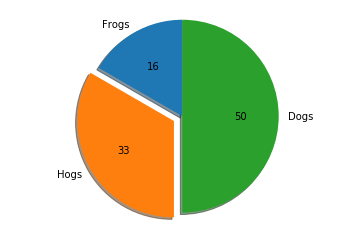

# Análise dos dados e Conclusão
(INSERIR O GRÁFICO AQUI)


De acordo com o gráfico produzido, podemos fazer uma breve análise de dados e tirar algumas conclusões prévias. Se considerarmos que um dos centros na área de saúde recebe praticamente o dobro de um dos centros na área de humanas, podemos notar que o resultado dos orçamentos em 2017 por área é um pouco defasado. Quando pensamos no IMD (Instuto Metrópole Digital), que é uma unidade especializada, podemos achar que ele seria o equivalente a um centro acadêmico, mas quando fazemos uma análise mais profunda na estrutura da UFRN (Universidade Federal do Rio Grande do Norte), nota-se que dentro dos centros acadêmicos existem várias áreas de conhecimento específicas, enquanto o IMD só possui uma. 

Fazendo uma breve comparação, a unidade especializada do IMD tem apenas 1 departamento, enquanto o CSS (Centro de Ciências da Saúde) possui 19 departamentos e o CCHLA (Centro de Ciências Humanas, Letras e Artes) possui 11 departamentos. Podemos notar que, embora o orçamento dos centros acadêmicos sejam maiores, quando a verba é dividida entre os departamentos existentes, este valor fica bem abaixo do que é disponibilizado ao IMD como um todo. Sendo assim, conclui-se que o IMD tem um orçamento proporcional bem maior do que as outras Unidades da UFRN.


